In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/dataset.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df = df.drop(columns=["Unnamed: 0"])
cols_to_drop = ["track_id", "artists", "album_name", "track_name"]
df = df.drop(columns=cols_to_drop)

# on enlève les colonnes inutiles pour l'analyse

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


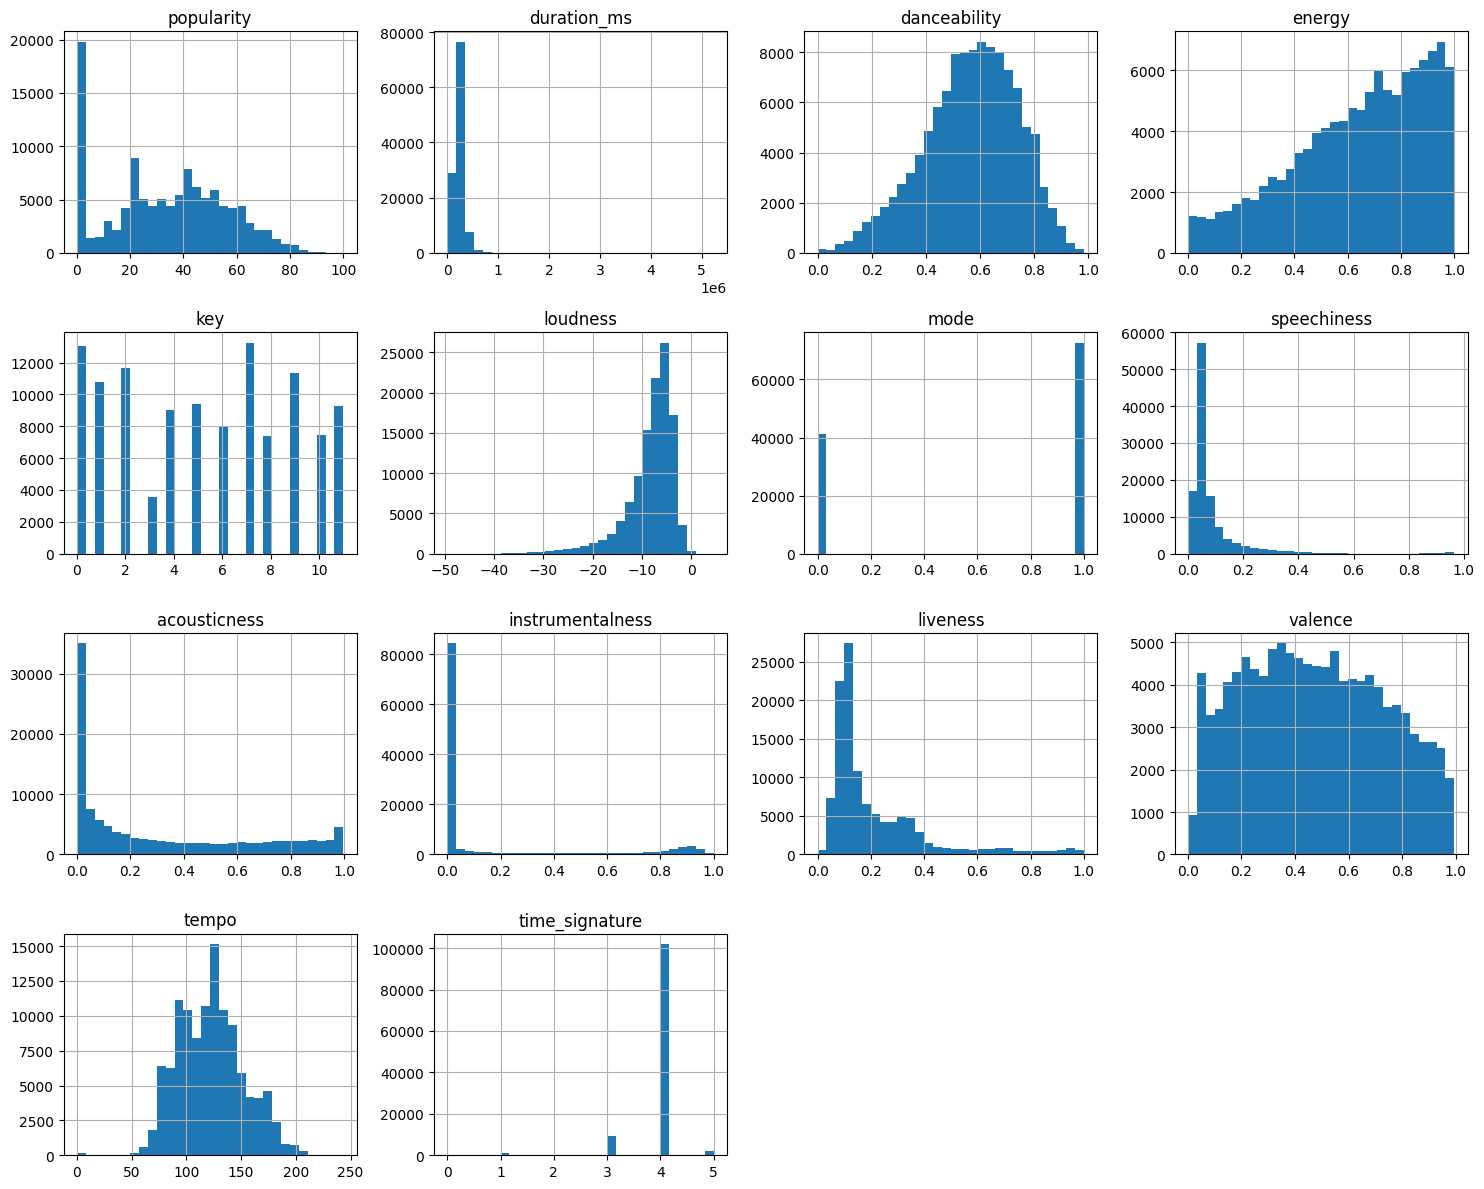

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()


--> matrices de corrélation

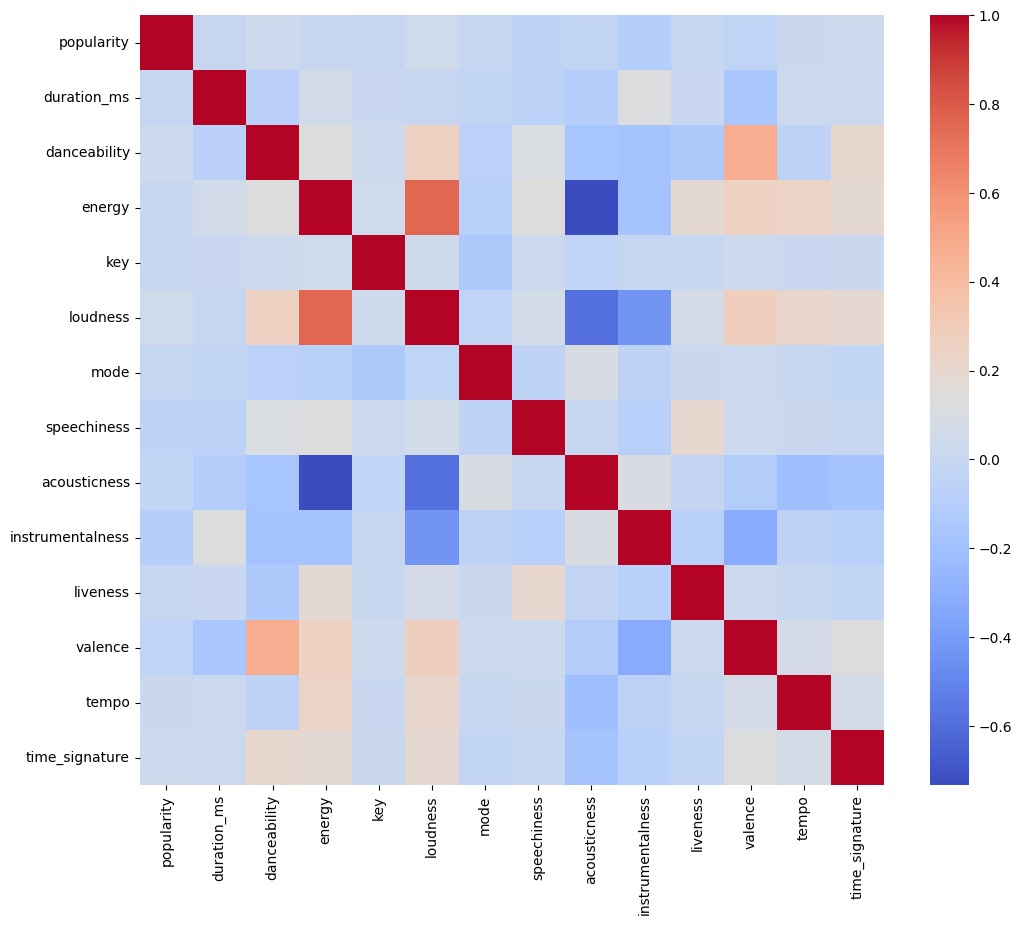

In [7]:
num_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12, 10))
sns.heatmap(num_df.corr(), cmap="coolwarm")
plt.show()



--> on essaye de repérer les outliers (on commence par les features temporelles)

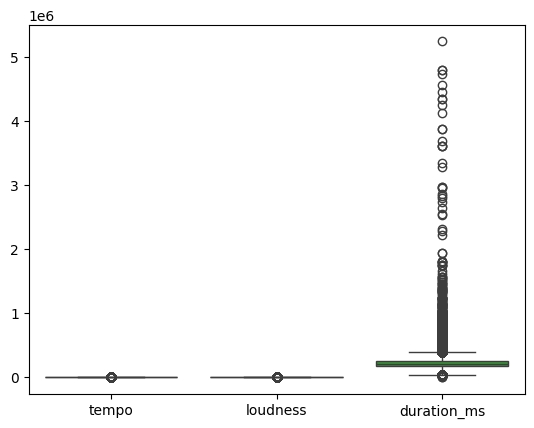

In [12]:
sns.boxplot(data=df[['tempo','loudness','duration_ms']])
plt.show()


on voit que duration_ms va jusqu'à 5 millions de ms (83 minutes), anormal, on va donc verifier ces valeurs extrêmes


In [13]:
df["duration_ms"].describe()


count    1.140000e+05
mean     2.280292e+05
std      1.072977e+05
min      0.000000e+00
25%      1.740660e+05
50%      2.129060e+05
75%      2.615060e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

In [14]:
df["duration_ms"].sort_values(ascending=False).head(10)


73617     5237295
10935     4789026
10984     4789026
24348     4730302
73840     4563897
13344     4447520
13245     4339826
13195     4334721
27926     4246206
101390    4120258
Name: duration_ms, dtype: int64

ce sont surement des podcast --> on les enlève : 

In [15]:
df = df[df["duration_ms"] <= 900000]
# on enlève les morceaux de plus de 15 minutes

In [8]:
df.shape
df.info()
df.isna().sum()
# on regarde les valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df["track_genre"].value_counts().head(20)
df["track_genre"].nunique()


114

In [10]:
df["track_genre"].value_counts().head(20)


track_genre
acoustic         1000
afrobeat         1000
alt-rock         1000
alternative      1000
ambient          1000
anime            1000
black-metal      1000
bluegrass        1000
blues            1000
brazil           1000
breakbeat        1000
british          1000
cantopop         1000
chicago-house    1000
children         1000
chill            1000
classical        1000
club             1000
comedy           1000
country          1000
Name: count, dtype: int64

In [17]:
df["macro_genre"].value_counts().plot(kind="bar", figsize=(12,4))


KeyError: 'macro_genre'

In [11]:
genres = sorted(df["track_genre"].unique())
len(genres), genres[:20]
# on regarde les genres présents dans le dataset

(114,
 ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country'])

on veut faire de la classification multi-classes, mais on a 114 genres différents, donc on voudrait réduire à environ 10 pour que les modèles performent bien, on va donc essayer de regrouper des genres entre eux de façon à réduire le nombre de classes

--> on va le faire dans 0_2_preprocessing